In [3]:
import pandas as pd
import re
import spacy
from collections import defaultdict
import matplotlib.pyplot as plt
import multiprocessing

In [5]:
df = pd.read_csv("scopus.csv")

In [6]:
df = df.dropna(subset=['Authors','Abstract','Author Keywords','Index Keywords'])

In [40]:
search_terms = {"openflow", "p4"}

In [8]:
# Initialize a dictionary to store term occurrences by year
term_occurrences_by_year = defaultdict(lambda: defaultdict(int))

In [15]:
# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [32]:
def search_function(args):
    index, row = args
    #doc = nlp(row["Title"])
    local_results = {}  # A local dictionary to store counts for this process
    for term in search_terms:
        if term in row["Abstract"].lower():
            local_results[term] = 1
        else:
            local_results[term] = 0
    return row["Year"], local_results

In [2]:
def worker_initializer(dic_year):
    # This function is called when each worker process is started
    # We set the shared dictionary in each worker process
    worker_initializer.dic_year = dic_year

In [41]:
num_processes = 8  # Number of processes/cores
manager = multiprocessing.Manager()
shared_dic_year = manager.dict()  # A shared dictionary to accumulate results

In [42]:
for year in df["Year"].unique():
    shared_dic_year[year] = manager.dict({term: 0 for term in search_terms})

In [43]:
pool = multiprocessing.Pool(processes=num_processes)
args_list = [(index, row) for index, row in df.iterrows()]
results = pool.map(search_function, args_list)
pool.close()
pool.join()

for year, local_results in results:
    for term, count in local_results.items():
        shared_dic_year[year][term] += count

In [44]:
dic_year = dict(shared_dic_year)

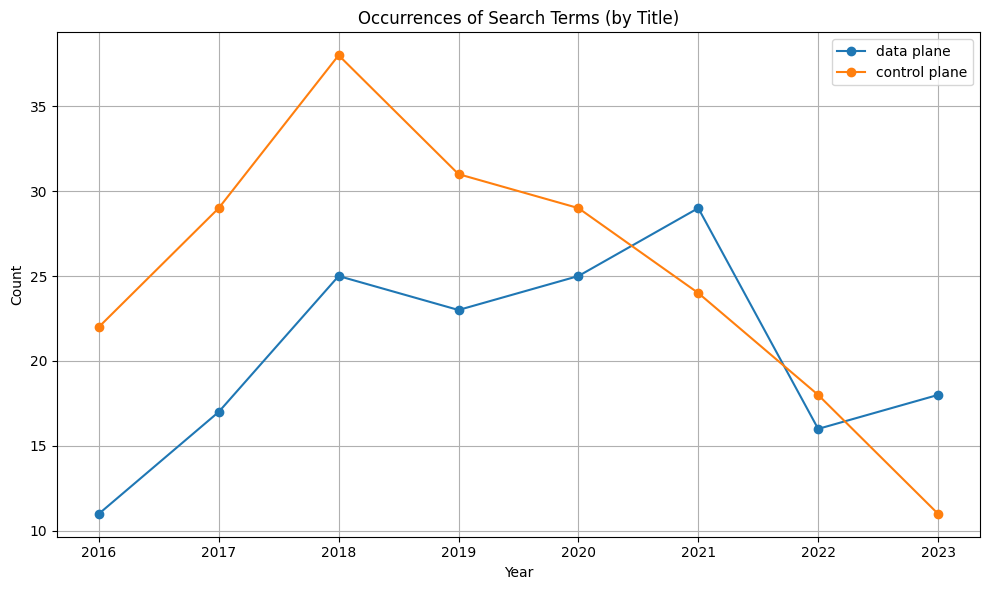

In [33]:
# Prepare data for plotting
years = sorted(dic_year.keys())
term_counts = {term: [dic_year[year][term] for year in years] for term in search_terms}

# Create a single plot with multiple lines (one for each term)
plt.figure(figsize=(10, 6))
for term, counts in term_counts.items():
    plt.plot(years, counts, marker='o', label=term)

plt.title('Occurrences of Search Terms (by Title)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(years)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

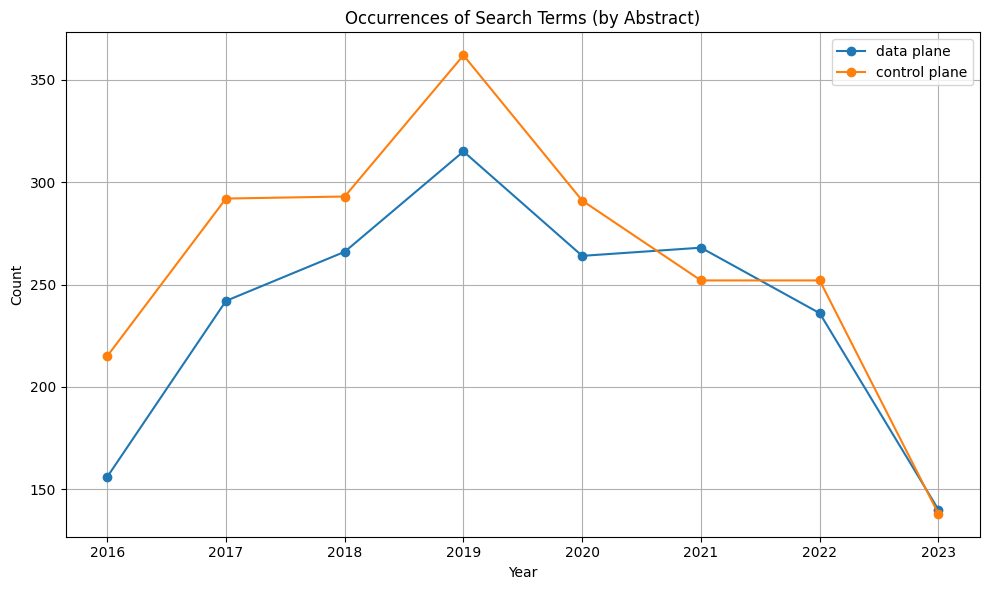

In [39]:
# Prepare data for plotting
years = sorted(dic_year.keys())
term_counts = {term: [dic_year[year][term] for year in years] for term in search_terms}

# Create a single plot with multiple lines (one for each term)
plt.figure(figsize=(10, 6))
for term, counts in term_counts.items():
    plt.plot(years, counts, marker='o', label=term)

plt.title('Occurrences of Search Terms (by Abstract)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(years)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

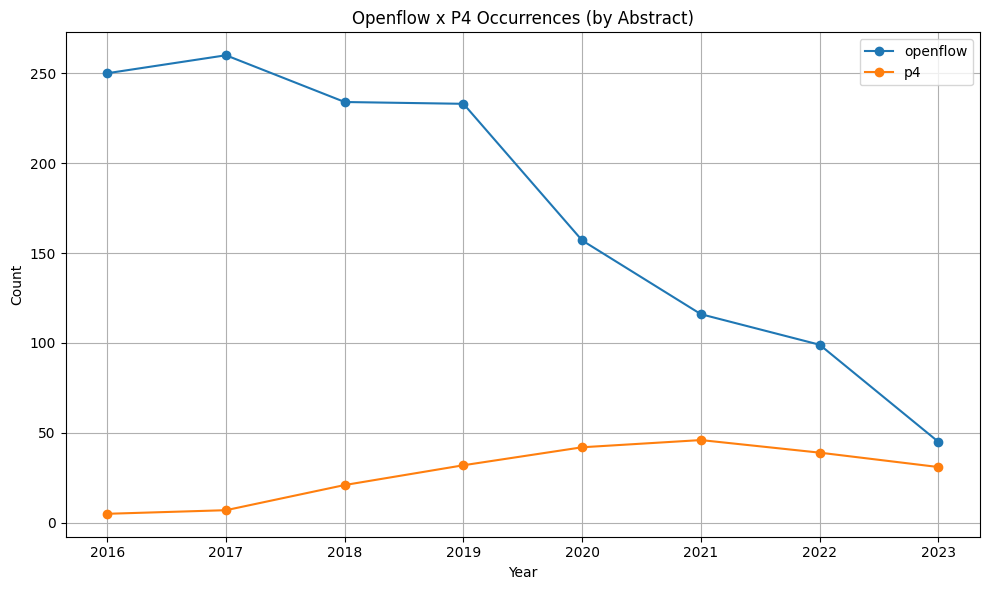

In [46]:
#Prepare data for plotting
years = sorted(dic_year.keys())
term_counts = {term: [dic_year[year][term] for year in years] for term in search_terms}

# Create a single plot with multiple lines (one for each term)
plt.figure(figsize=(10, 6))
for term, counts in term_counts.items():
    plt.plot(years, counts, marker='o', label=term)

plt.title('Openflow x P4 Occurrences (by Abstract)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(years)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()